This note book contain codes predicting diabetes using classification model\
Author Name: Sania\
Date Created: 2/4/2025

About Data\
The objective of this notebook is to predict diabetes outcomes (alive or dead) using a variety of classification models on clinical and biometric data.

In [107]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import Stats library
from scipy import stats
# import libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import libraries for classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [108]:
# Load Dataset
df = pd.read_csv(r'C:\Users\sania.siddiqui\Downloads/diabetes-vid.csv')

Read data

In [109]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [110]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead
767,1,93,70,31,0,30.4,0.315,23,alive


In [111]:
df.shape

(768, 9)

In [112]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [113]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [114]:
df.select_dtypes(include=['object']).columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Outcome: ['dead' 'alive']


In [115]:
df_continous=df.select_dtypes(exclude=['object']).columns

In [116]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


outliers are present in the insulin levels

In [117]:
# Clean Dataset
# Identify null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [118]:
print(f"No null values in the dataset: {df.isnull().sum().sum()}")

No null values in the dataset: 0


In [119]:
# Identify duplicates
df.duplicated().sum()
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [120]:
# Identify inconsistencies

print(f"Data types in the dataset: {df.dtypes}")

Data types in the dataset: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object


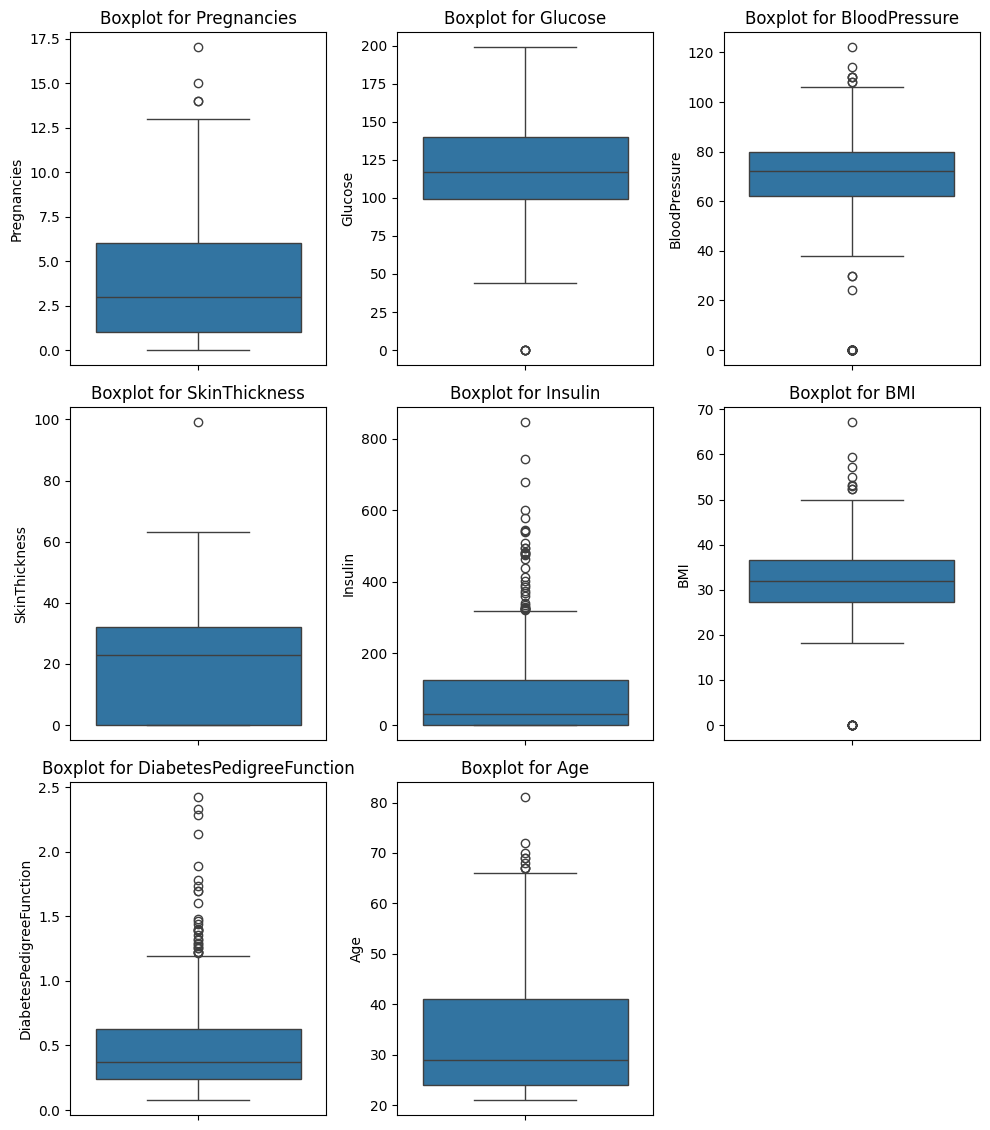

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: df_continous = ['age', 'blood_pressure', 'cholesterol']
n_plots = len(df_continous)
ncols = 3
nrows = (n_plots + ncols - 1) // ncols  # Ensures enough rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(df_continous):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

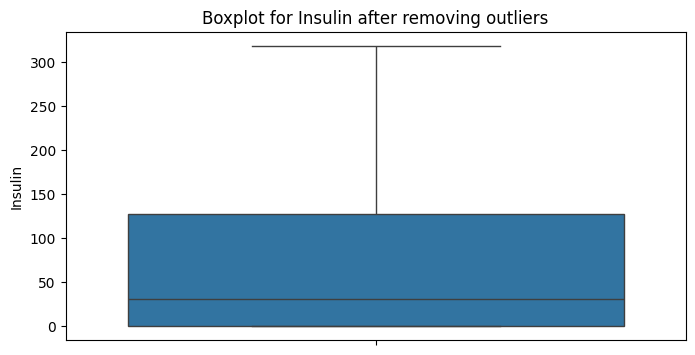

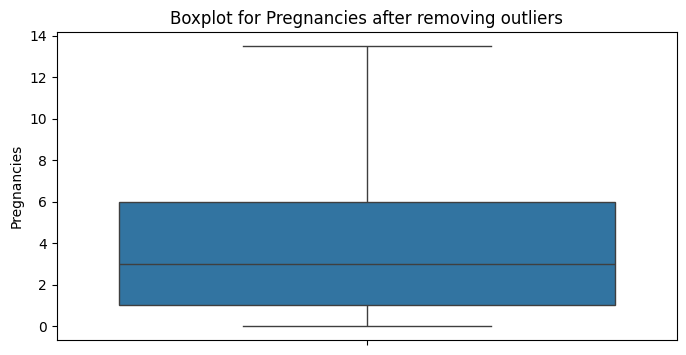

In [122]:
# outliers are present in data we need to remove outliers from number of pregnancies and in insulin level
# Remove outliers from 'Pregnancies' column
Q1=df[['Insulin', 'Pregnancies']].quantile(0.25)
Q3=df[['Insulin', 'Pregnancies']].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Insulin'] = np.where(df['Insulin'] < lower_bound['Insulin'], lower_bound['Insulin'], df['Insulin'])
df['Insulin'] = np.where(df['Insulin'] > upper_bound['Insulin'], upper_bound['Insulin'], df['Insulin'])
df['Pregnancies'] = np.where(df['Pregnancies'] < lower_bound['Pregnancies'], lower_bound['Pregnancies'], df['Pregnancies'])
df['Pregnancies'] = np.where(df['Pregnancies'] > upper_bound['Pregnancies'], upper_bound['Pregnancies'], df['Pregnancies'])

# make boxplot after removing outliers
for col in ['Insulin', 'Pregnancies']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot for {col} after removing outliers')
    plt.show()



Perform EDA

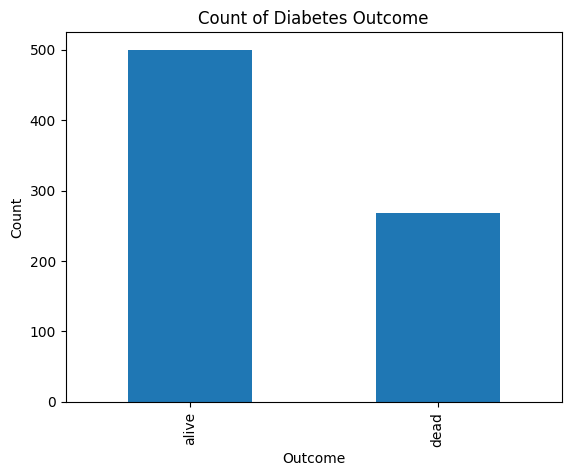

In [123]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Count of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count') 
plt.show()

In [124]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [125]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0.0,33.6,0.627,50,dead
1,1.0,85,66,29,0.0,26.6,0.351,31,alive
2,8.0,183,64,0,0.0,23.3,0.672,32,dead
3,1.0,89,66,23,94.0,28.1,0.167,21,alive
4,0.0,137,40,35,168.0,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180.0,32.9,0.171,63,alive
764,2.0,122,70,27,0.0,36.8,0.340,27,alive
765,5.0,121,72,23,112.0,26.2,0.245,30,alive
766,1.0,126,60,0,0.0,30.1,0.349,47,dead


In [126]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [127]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [128]:
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler()
df = RobustScaler.fit_transform(df)
df = pd.DataFrame(df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [129]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294,1.0
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647,0.0
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471,1.0
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588,0.0
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294,1.0
...,...,...,...,...,...,...,...,...,...
763,1.4,-0.387879,0.222222,0.78125,1.174853,0.096774,-0.526797,2.000000,0.0
764,-0.2,0.121212,-0.111111,0.12500,-0.239686,0.516129,-0.084967,-0.117647,0.0
765,0.4,0.096970,0.000000,0.00000,0.640472,-0.623656,-0.333333,0.058824,0.0
766,-0.4,0.218182,-0.666667,-0.71875,-0.239686,-0.204301,-0.061438,1.058824,1.0


In [130]:
# Build Model
from sklearn.model_selection import cross_val_score

# Select features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

In [131]:
# Run accuracy for each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve    
import seaborn as sns   
import matplotlib.pyplot as plt


Random Forest Accuracy: 0.72
Gradient Boosting Accuracy: 0.74
Support Vector Machine Accuracy: 0.72
Logistic Regression Accuracy: 0.75


Random Forest: 72.08%
Gradient Boosting: 74.03%
Support Vector Machine: 72.08%
Logistic Regression: 74.68%
Confusion Matrix
[[77 22]
 [21 34]]


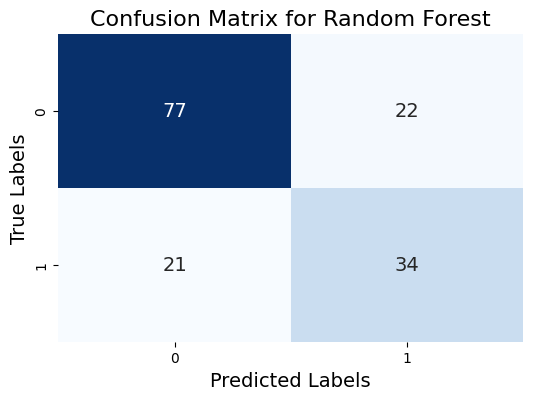

Confusion Matrix
[[77 22]
 [18 37]]


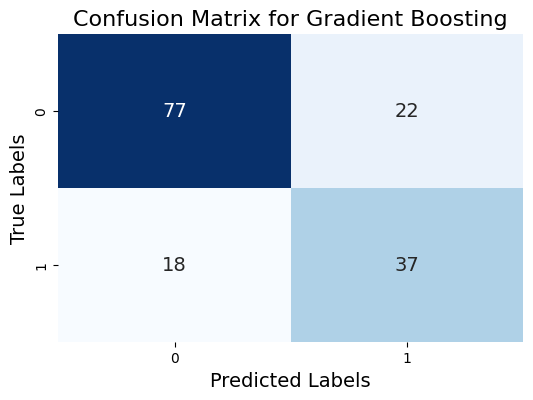

Confusion Matrix
[[79 20]
 [23 32]]


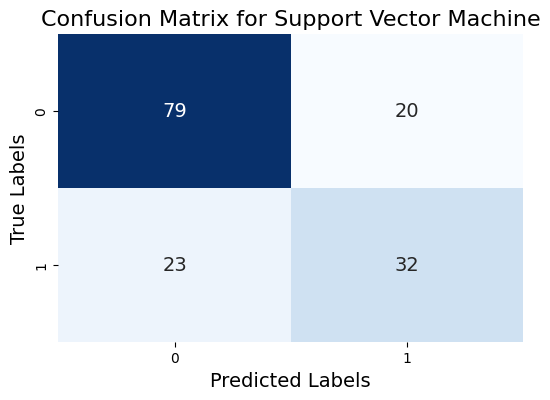

Confusion Matrix
[[79 20]
 [19 36]]


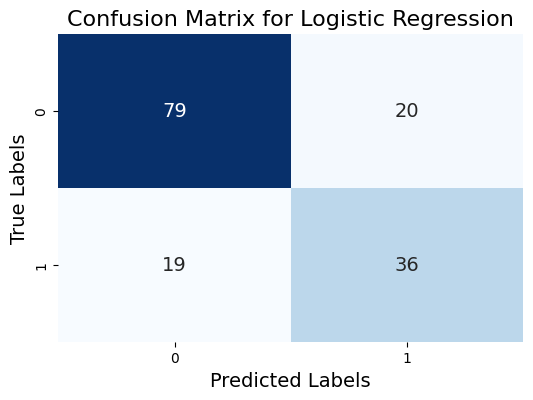

In [132]:
for name, model in models:
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))


for name, model in models:
    y_pred = model.predict(X_test)
    # PRINT THE CONFUSION MATRIX
    print("Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(f'Confusion Matrix for {name}', fontsize=16)
    plt.show()

In [133]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    best_accuracy = 0
    best_model = None
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.7736771957883514
Test Accuracy: 0.7207792207792207

Model: Gradient Boosting
Cross-validation Accuracy: 0.7703718512594963
Test Accuracy: 0.7402597402597403

Model: Support Vector Machine
Cross-validation Accuracy: 0.7606024256963881
Test Accuracy: 0.7207792207792207

Model: Logistic Regression
Cross-validation Accuracy: 0.7622550979608157
Test Accuracy: 0.7467532467532467

Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('model', LogisticRegression(random_state=42))])


Best Performing Model: Logistic Regression

It had the highest test accuracy (74.7%).

Also performed consistently well in cross-validation.